# Python Assignment \#3: Bayes Detectors

1) Repeat steps (1)-(3) from PA#2, loading the digits dataset, learning the mean for classes "0" and "1", and defining the likelihood functions as before. You do not need to display any sample images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
images = digits.images
targets = digits.target

#class 0
indices_0 = targets == 0
images_0 = images[indices_0]
mu_0 =  np.mean(images_0,0)

#class 1
indices_1 = targets == 1
images_1 = images[indices_1]
mu_1 =  np.mean(images_1,0)

2) For sigma^2  = 1000, derive the MAP classifier (i.e., the classifier that minimizes the probability of classification error) for pi_0 = 1/2. Draw 1000 samples from the classes (using this prior!) and compute empirically the probability of error. Repeat for pi_0=1/4 and pi_0 = 3/4.

In [45]:
pi0s = [1/2, 1/4, 1/1000]

sigma_2 = 1000
NUM_SAMPLES = 5000

w = mu_1.flatten() - mu_0.flatten()

P_e = np.zeros(len(pi0s))
for i in range(0,len(pi0s)):
    pi0 = pi0s[i]
    pi1 = 1-pi0
    threshold = np.log(pi0/pi1)
    for k in range(0,NUM_SAMPLES):
        H = np.random.choice(2,p=[pi0,pi1])
        if(H==0):
            y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L>threshold):
                P_e[i] += 1/NUM_SAMPLES
        else:
            y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L<threshold):
                P_e[i] += 1/NUM_SAMPLES
                
print("Probability of error for each prior: " + str(P_e))

Probability of error for each prior: [ 0.2498  0.1962  0.0016]


3)  For noise variances sigma^2 = {10,100,500,1000,5000,10000}, numerically compute and plot the probability of error as a function of pi_0. Do this by estimating the probability of error for a range of values 0 <= pi_0 <= 1 and plotting the result.

/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars


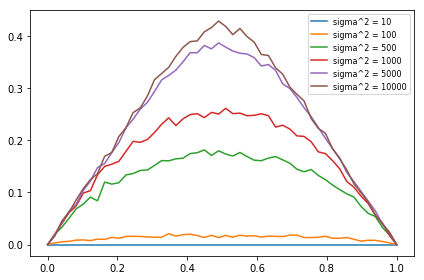

In [53]:
sigma_2s = [10, 100, 500, 1000, 5000, 10000]
pi0s = np.linspace(0,1,50)
P_e = np.zeros([len(sigma_2s), len(pi0s)])
NUM_SAMPLES = 5000

w = mu_1.flatten() - mu_0.flatten()

for i in range(0,len(sigma_2s)):
    sigma_2 = sigma_2s[i]
    for j in range(0,len(pi0s)):
        pi0 = pi0s[j]
        pi1 = 1-pi0
        threshold = np.log(pi0/pi1)
        for k in range(0,NUM_SAMPLES):
            H = np.random.choice(2,p=[pi0,pi1])
            if(H==0):
                y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
                y = y.flatten()
                L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
                if(L>threshold):
                    P_e[i,j] += 1/NUM_SAMPLES
            else:
                y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
                y = y.flatten()
                L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
                if(L<threshold):
                    P_e[i,j] += 1/NUM_SAMPLES
    plt.plot(pi0s,P_e[i,:])

plt.gca().legend(['sigma^2 = 10','sigma^2 = 100','sigma^2 = 500','sigma^2 = 1000','sigma^2 = 5000','sigma^2 = 10000'],loc=0,fontsize=8)
plt.tight_layout()
plt.show()

4) Fix sigma^2 = 1000. Consider the cost functions C00=C00=0, C10=C01=1. Derive the optimum Bayes detector and the *Bayes risk* as a function of pi_0. Repeat for cost functions C10=5,C01=1 and C10=1,C01=5. Plot all three Bayes risk curves on the same axis. Where is the worst case prior in each case? Why?

/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars
/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log
/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: divide by zero encountered in log
/Users/mnokleby/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:59: RuntimeWarning: divide by zero encountered in double_scalars


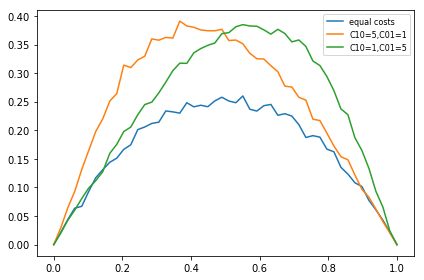

In [55]:
sigma_2 = 1000
pi0s = np.linspace(0,1,50)
NUM_SAMPLES = 5000

w = mu_1.flatten() - mu_0.flatten()

C10=1
C01=1
P_e = np.zeros(len(pi0s))
for j in range(0,len(pi0s)):
    pi0 = pi0s[j]
    pi1 = 1-pi0
    threshold = np.log((C10*pi0)/(C01*pi1))
    for k in range(0,NUM_SAMPLES):
        H = np.random.choice(2,p=[pi0,pi1])
        if(H==0):
            y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L>threshold):
                P_e[j] += 1/NUM_SAMPLES
        else:
            y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L<threshold):
                P_e[j] += 1/NUM_SAMPLES
plt.plot(pi0s,P_e)

C10=5
C01=1
P_e = np.zeros(len(pi0s))
for j in range(0,len(pi0s)):
    pi0 = pi0s[j]
    pi1 = 1-pi0
    threshold = np.log((C10*pi0)/(C01*pi1))
    for k in range(0,NUM_SAMPLES):
        H = np.random.choice(2,p=[pi0,pi1])
        if(H==0):
            y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L>threshold):
                P_e[j] += 1/NUM_SAMPLES
        else:
            y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L<threshold):
                P_e[j] += 1/NUM_SAMPLES
plt.plot(pi0s,P_e)

C10=1
C01=5
P_e = np.zeros(len(pi0s))
for j in range(0,len(pi0s)):
    pi0 = pi0s[j]
    pi1 = 1-pi0
    threshold = np.log((C10*pi0)/(C01*pi1))
    for k in range(0,NUM_SAMPLES):
        H = np.random.choice(2,p=[pi0,pi1])
        if(H==0):
            y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L>threshold):
                P_e[j] += 1/NUM_SAMPLES
        else:
            y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            L = 1/sigma_2*w.T@y + 1/(2*sigma_2)*(mu_0.flatten().T@mu_0.flatten() - mu_1.flatten().T@mu_1.flatten())
            if(L<threshold):
                P_e[j] += 1/NUM_SAMPLES
plt.plot(pi0s,P_e)

plt.gca().legend(['equal costs','C10=5,C01=1','C10=1,C01=5'],loc=0,fontsize=8)
plt.tight_layout()
plt.show()